# Disorder maps

In [2]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [12]:
import sys, os
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

In [2]:
from brainsmash.utils.dataio import load
x=load("../data/23262.L.func.gii")

In [6]:
x[:20]

array([1024., 1029.,    0.,    2., 1024.,    0.,    0., 1025., 1000.,
       1012.,    2., 1007.,    2.,    2.,    0., 1022., 1031., 1022.,
       1029., 1028.], dtype=float32)

In [8]:
from brainsmash.workbench.geo import parcellate
?parcellate

Signature: parcellate(infile, dlabel_file, outfile, delimiter=' ', unassigned_value=0)
Docstring:
Parcellate a dense distance matrix.

Parameters
----------
infile : filename
    Path to `delimiter`-separated distance matrix file
dlabel_file : filename
    Path to parcellation file  (.dlabel.nii)
outfile : filename
    Path to output text file (to be created)
delimiter : str, default ' '
    Delimiter between elements in `infile`
unassigned_value : int, default 0
    Label value which indicates that a vertex/voxel is not assigned to
    any parcel. This label is excluded from the output. 0 is the default
    value used by Connectome Workbench, e.g. for ``-cifti-parcellate``.

Returns
-------
filename : str
    Path to output parcellated distance matrix file

Notes
-----
For two parcels A and B, the inter-parcel distance is defined as the mean
distance between area i in parcel A and area j in parcel B, for all i,j.

Inputs `infile` and `dlabel_file` should include the same anatomical
st

In [13]:
from brainsmash.workbench.geo import parcellate
infile = "/home/rajd2/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/LeftDenseGeodesicDistmat.txt"
outfile = "../data/LeftParcelGeodesicDistmat_DK.txt"
dlabel = "../data/23262.L.func.gii"
parcellate(infile, dlabel, outfile)


Computing parcellated distance matrix

For a 32k-vertex cortical hemisphere, this takes about 30 mins for the HCP MMP parcellation. For subcortex, this takes about an hour for the CAB-NP parcellation.


ValueError: Files must contain same number of areas
163842 areas in ../data/23262.L.func.gii
2631 rows and 32492 cols in /home/rajd2/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/LeftDenseGeodesicDistmat.txt

In [177]:
maps = get_disorder_maps()
maps.head()

,AD,ADHD,ANX,ASD,MCI,MDD,SCZ
region,,,,,,,
lh_bankssts,-1.241970,-0.083818,0.983634,-0.265312,-0.928661,0.389026,0.405498
lh_caudalanteriorcingulate,0.849102,0.851942,1.097002,-1.870202,1.232917,2.660308,1.430681
lh_caudalmiddlefrontal,0.304156,-0.764371,0.303426,-1.538156,0.287226,-0.011789,0.051987
lh_cuneus,1.837609,0.001251,0.303426,0.841510,1.175017,-2.149466,0.829712
lh_entorhinal,-1.964341,0.937011,-0.150046,-1.040086,-2.684942,-0.011789,1.218574


In [172]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
dk_ds8 = pcaVersion(pd.read_csv(data_dir + 'dk_ds8.csv', index_col=0))
scores = dk_ds8.scores.iloc[:,:3].apply(lambda x: (x-np.mean(x))/np.std(x)).rename_axis('region')

New PCA version


In [178]:
get_corrs(scores, maps, atlas='dk')

,PC1,PC2,PC3
AD,0.561917,-0.045676,0.524781
ADHD,-0.408635,0.144483,-0.215858
ANX,0.073371,-0.018953,0.099225
ASD,0.525087,0.057567,-0.159850
MCI,0.529732,-0.091046,0.412719
MDD,-0.322710,-0.003030,0.305752
SCZ,0.011718,0.445672,0.239780


In [126]:
generate_spins(maps, n_rotate=1000, outfile="../outputs/spin_disorders_1000.npy", atlas='dk')
generate_spins_from_pcs(scores, n_rotate=1000, outfile='../outputs/spin_pcs_dk_10.npy', atlas='dk')

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/spin_pcs_dk_1000.npy'

In [129]:
spin_maps_1000 = np.load("../outputs/spin_disorders_1000.npy")
spin_pcs_1000 = np.load("../outputs/spin_pcs_dk_1000.npy")

In [201]:
# null_corrs_dict = {}
# null_corrs_dict['spin_maps_p'] = corr_nulls_from_maps(spin_maps_1000, scores, maps, method='pearson')
# null_corrs_dict['spin_maps_p_pool'] = corr_nulls_from_maps(spin_maps_1000, scores, maps, method='pearson', pool=True)
# null_corrs_dict['spin_pcs_p'] = corr_nulls_from_pcs(spin_pcs_1000, scores, maps, method='pearson')
# null_corrs_dict['spin_pcs_p_pool'] = corr_nulls_from_pcs(spin_pcs_1000, scores, maps, method='pearson', pool=True)

null_corrs_dict['spin_maps_s'] = corr_nulls_from_maps(spin_maps_1000, scores, maps, method='spearman')
null_corrs_dict['spin_maps_s_pool'] = corr_nulls_from_maps(spin_maps_1000, scores, maps, method='spearman', pool=True)
null_corrs_dict['spin_pcs_s'] = corr_nulls_from_pcs(spin_pcs_1000, scores, maps, method='spearman')
null_corrs_dict['spin_pcs_s_pool'] = corr_nulls_from_pcs(spin_pcs_1000, scores, maps, method='spearman', pool=True)


In [202]:
scores_plot = scores.join(get_labels_dk())
corrs = get_corrs(scores, maps, atlas='dk')
null_corrs = null_corrs_dict['spin_pcs_s_pool']
null_p = get_null_p(corrs, null_corrs)

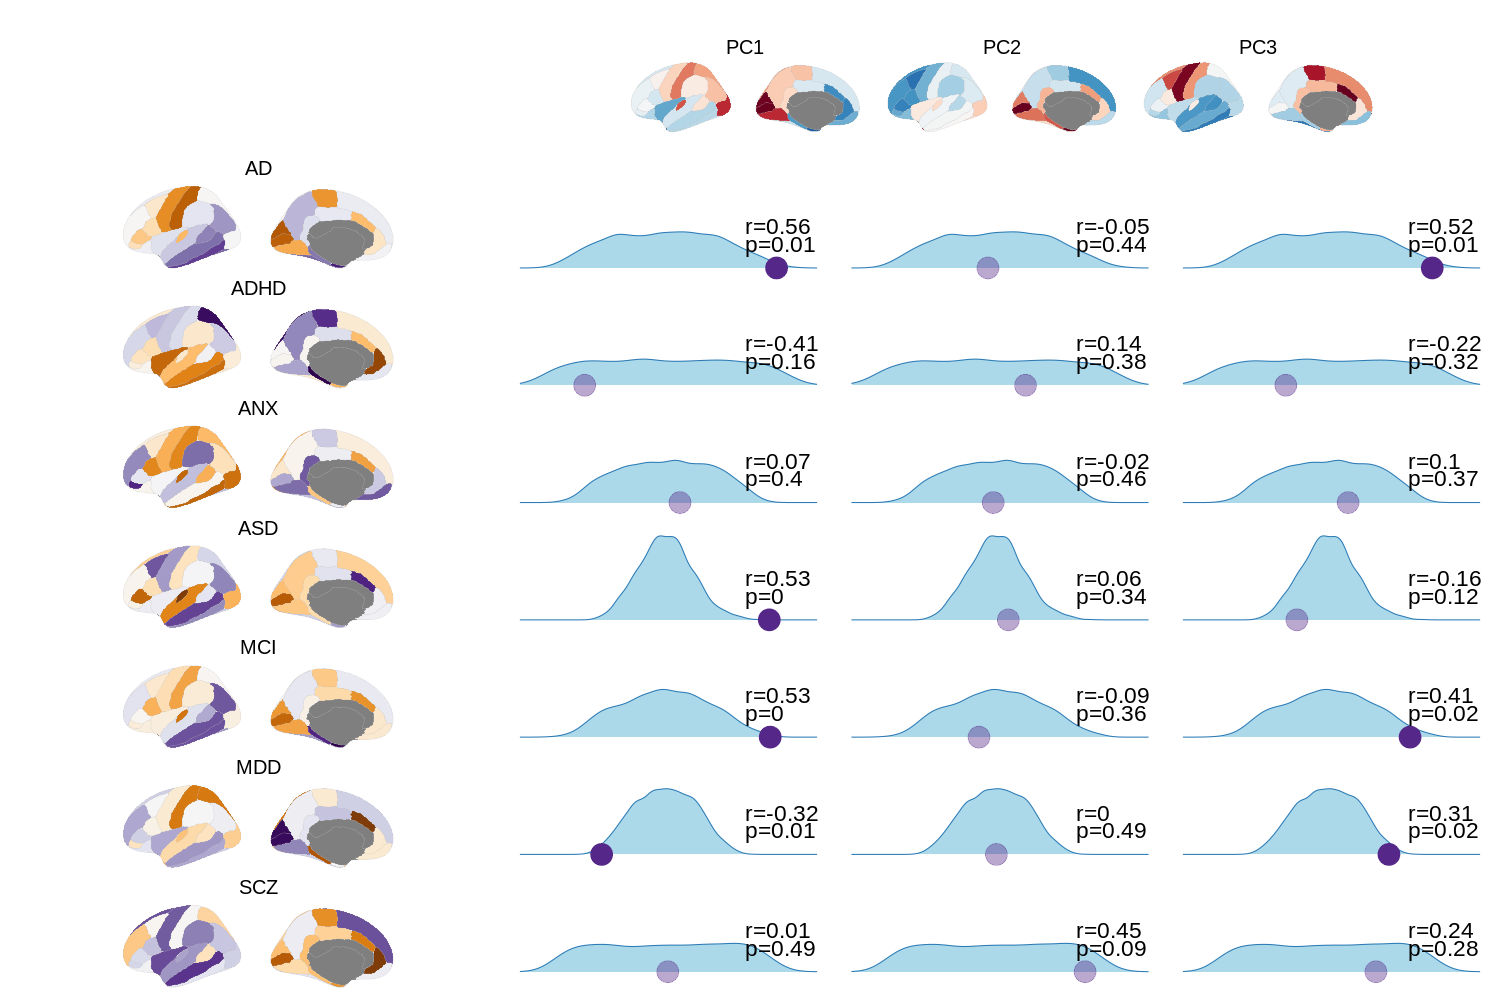

In [203]:
%%R -i corrs -i null_corrs -i null_p -i scores_plot -i maps -w 1500 -h 1000
source("../code/plot_maps.R")
source("../code/brainPlots.R")
g1 <- plot_null_corrs(corrs, null_corrs, null_p)
g2 <- plot_dk_wide(scores_plot, spacing=0) + guides(fill='none')
g3 <- plot_maps_dk(maps, colors=rev(brewer.puor(100)), ncol=1) + guides(fill='none')

(
    ((plot_spacer() | g2) + plot_layout(widths=c(1,2))) / 
    ((g3 | g1) + plot_layout(widths=c(1,2)))
) + plot_layout(heights=c(1.2,12))